In [1]:
import sys
sys.path.append("../")
from IPython.display import display, Math
import os
import scipy as sci
import numpy as np
import matrix_handler as mx
from solvers_lab5 import Landweber
from solvers_lab5 import Jacobi_iterative
from solvers_lab5 import Gauss_Seidel_iterative
from solvers_lab5 import SOR_method
from solvers_lab5 import SD_method
from solvers_lab5 import Kaczmarz_algorithm
from solvers_lab5 import Grand_Solverr

import matplotlib.pyplot as plt

zadania = "zadania"

In [2]:
A = np.loadtxt(os.path.join(zadania, "zad1_A.txt") , float, delimiter=" ", ndmin=2)
b = np.loadtxt(os.path.join(zadania, "zad1_b.txt"), float, delimiter=" ", ndmin=1)
xe = np.loadtxt(os.path.join(zadania, "zad1_xe.txt"), float, delimiter=" ", ndmin=1)
x0 = np.array([0, 0, 0, 0])

Warning SD: convergence may not occur
Warning Landweber: convergence may not occur


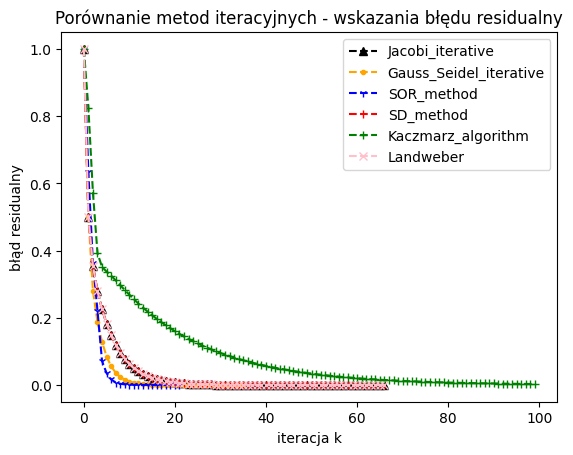

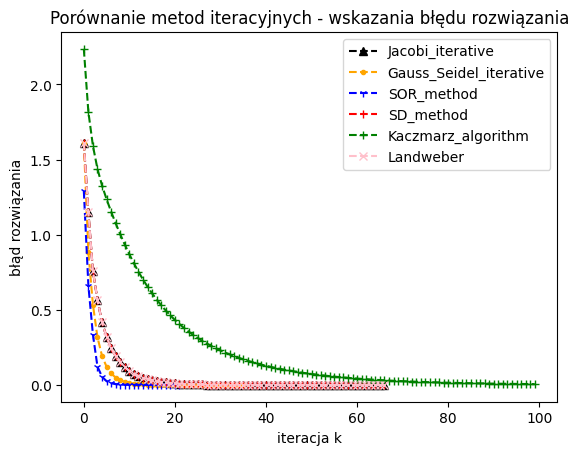

In [3]:
algorithmss = [Jacobi_iterative, Gauss_Seidel_iterative, SOR_method, SD_method, Kaczmarz_algorithm, Landweber]
xs = Grand_Solverr(A, b, x0, xe, algorithmss)

In [4]:
from solvers_lab1 import gauss_elimination
from solvers_lab1 import back_substitution

Ab = np.loadtxt(os.path.join(zadania, "zad1.txt"), float, delimiter=" ", ndmin=2)
N = len(Ab)
display(Math("[A|b] ="))
mx.print_matrix(Ab)
if not gauss_elimination(Ab, N):
    print("Division by zero\n")
else:
    x = back_substitution(Ab, N)
    display(Math("x ="))
    mx.print_matrix(x)

xs.append(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Porównanie błędu rozwiązania / błędu względnego metody Gaussa z metodami iteracyjnymi.**

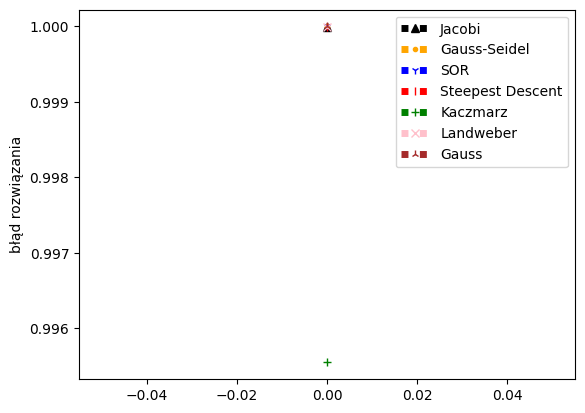

In [5]:
plt.figure(3)

xError = []
colors = ["black", "orange", "blue", "red", "green", "pink", "brown"]
markerList = ["^", ".", "1", "|", "+", "x", "2"]
labelList = ["Jacobi", "Gauss-Seidel", "SOR", "Steepest Descent", "Kaczmarz", "Landweber", "Gauss"]
for i in range(len(xs)):
    xError.append(np.linalg.norm(xs[i]) / np.linalg.norm(xe))
    plt.plot(0, xError[i], ls='dotted', c=colors[i], marker=markerList[i], lw=5, label=labelList[i])

plt.legend()
plt.ylabel("błąd rozwiązania")
plt.show()